In [1]:
import numpy as np
from spectral_clustering import spectral_clustering
import functions_for_plotting
from asymmetric_laplacian_distribution import get_index_per_class, get_labels, labels_to_layout_mapping
from sklearn.cluster import KMeans
import training_set_split
import seaborn as sns
import prediction_strength
import importlib
import matplotlib.pyplot as plt

/Users/paule/anaconda3/envs/bon17/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load Data and True Labels

In [2]:
#----------------------------------------------- DATA ------------------------------------------------------------------
data_dir = "data/"

clear_data = np.load(data_dir + "clearly_separated_data_F_signal_noise.npy")
ambig_data = np.load(data_dir + "ambiguous_data_tau_amplitude_F_signal_noise.npy")
#np.load(data_dir + "ambiguous_data_tau_amplitude_F_signal_noise.npy") #np.load(data_dir + "clearly_separated_data_F_signal_noise.npy")

clear_amplitude_conditions = ["S", "M", "L"]  #["S", "S/M", "M", "M/L", "L"] #["S", "M", "L"]
ambig_amplitude_conditions = ["S", "S/M", "M", "M/L", "L"]

clear_time_constant_conditions = ["equal_sharp", "equal_wide", "wide_sharp_negative_skew", "sharp_wide_positive_skew"]
ambig_time_constant_conditions = ["equal_sharp", "equal_medium", "equal_wide", "wide_sharp_negative_skew", "wide_medium_negative_skew","medium_sharp_negative_skew","sharp_wide_positive_skew", "medium_wide_positive_skew" ,"sharp_medium_positive_skew"]

#["equal_sharp", "equal_medium", "equal_wide", "wide_sharp_negative_skew", "wide_medium_negative_skew","medium_sharp_negative_skew","sharp_wide_positive_skew", "medium_wide_positive_skew" ,"sharp_medium_positive_skew"]
#["equal_sharp", "equal_wide", "wide_sharp_negative_skew", "sharp_wide_positive_skew"]

ambiguous_conditions = ["S/M", "M/L", "equal_medium", "wide_medium_negative_skew", "medium_sharp_negative_skew", "medium_wide_positive_skew", "sharp_medium_positive_skew"]

samples_per_condition = 1000
samples_per_ambiguous_condition = 400

ambig_cluster_dict = get_index_per_class(ambig_amplitude_conditions,ambig_time_constant_conditions, ambiguous_conditions, samples_per_condition, samples_per_ambiguous_condition)
clear_cluster_dict = get_index_per_class(clear_amplitude_conditions,clear_time_constant_conditions, [], samples_per_condition, samples_per_ambiguous_condition)


clear_true_labels = get_labels(clear_data, clear_cluster_dict)
ambig_true_labels = get_labels(ambig_data, ambig_cluster_dict)

clear_clusters_ordered = list(range(0,len(clear_cluster_dict)+1))
clear_layout_label_mapping = labels_to_layout_mapping(clear_clusters_ordered, 4, (1,4)) #labels_to_layout_mapping(clusters_ordered, 4, (1,4)) #labels_to_layout_mapping(clusters_ordered, 9, (2,5))

ambig_clusters_ordered = list(range(0,len(ambig_cluster_dict)+1))
ambig_layout_label_mapping = labels_to_layout_mapping(ambig_clusters_ordered, 9, (2,5))

## Cluster Balanced Split

In [3]:
clear_train_fold_indices, _ = training_set_split.get_training_folds(clear_data, clear_cluster_dict,cluster_split="balanced",folds = 2)
ambig_train_fold_indices, _ = training_set_split.get_training_folds(ambig_data, ambig_cluster_dict,cluster_split="balanced",folds = 2)


clear_training_set = clear_data[clear_train_fold_indices[0]]
clear_validation_set = clear_data[clear_train_fold_indices[1]]

ambig_training_set = ambig_data[ambig_train_fold_indices[0]]
ambig_validation_set = ambig_data[ambig_train_fold_indices[1]]

clear_true_labels_training = clear_true_labels[clear_train_fold_indices[0]]
clear_true_labels_validation = clear_true_labels[clear_train_fold_indices[1]]

ambig_true_labels_training = ambig_true_labels[ambig_train_fold_indices[0]]
ambig_true_labels_validation = ambig_true_labels[ambig_train_fold_indices[1]]

## Cluster Unbalanced Split

In [ ]:
seed = np.random.seed(42)
clear_clusters = np.arange(12)
ambig_clusters = np.arange(45)
np.random.shuffle(clear_clusters)
np.random.shuffle(ambig_clusters)

clear_training_clusters = clear_clusters[0:6]
ambig_training_clusters = ambig_clusters[0:23]

In [ ]:
clear_train_fold_indices, clear_valid_fold_indices = training_set_split.get_training_folds(clear_data, clear_cluster_dict,cluster_split="unbalanced",training_clusters = clear_training_clusters,folds = 2)
ambig_train_fold_indices, ambig_valid_fold_indices = training_set_split.get_training_folds(ambig_data, ambig_cluster_dict,cluster_split="unbalanced",training_clusters = ambig_training_clusters, folds = 2)


clear_training_set = clear_data[clear_train_fold_indices]
clear_validation_set = clear_data[clear_valid_fold_indices]

ambig_training_set = ambig_data[ambig_train_fold_indices]
ambig_validation_set = ambig_data[ambig_train_fold_indices]

clear_true_labels_training = clear_true_labels[clear_train_fold_indices]
clear_true_labels_validation = clear_true_labels[clear_valid_fold_indices]

ambig_true_labels_training = ambig_true_labels[ambig_train_fold_indices]
ambig_true_labels_validation = ambig_true_labels[ambig_valid_fold_indices]

In [ ]:
print(np.unique(clear_true_labels_training,return_counts = True))
print(np.unique(clear_true_labels_validation,return_counts = True))
print(np.unique(ambig_true_labels_training,return_counts = True))
print(np.unique(ambig_true_labels_validation,return_counts = True))

In [ ]:
#k = 10
#reg = None

In [ ]:
#labels, eigvec, eigval = spectral_clustering(clear_training_set, "euclidean", range(1,50),  k=k, mutual = False, weighting = "distance", normalize = True, reg_lambda = reg, save_laplacian = False, save_eigenvalues_and_vectors = False)
#np.save("labels_k=%d_reg=%s_clear_training_unbalanced" % (k, str(reg)),labels)

In [ ]:
#labels, eigvec, eigval = spectral_clustering(clear_validation_set, "euclidean", range(1,50),  k=k, mutual = False, weighting = "distance", normalize = True, reg_lambda = reg, save_laplacian = False, save_eigenvalues_and_vectors = False)
#np.save("labels_k=%d_reg=%s_clear_validation_unbalanced" % (k, str(reg)),labels)

In [ ]:
#save_file_clusters = "true_clusters_clear_unbalanced_validation_mean.pdf" 

In [ ]:
#functions_for_plotting.plot_clusters(clear_validation_set, clear_true_labels_validation,clear_true_labels_validation, 3,4, clear_layout_label_mapping,figsize=(20,20),n_bursts = 100,y_lim = (0,16),save_file=save_file_clusters ,subplot_adjustments= [0.05,0.95,0.03,0.9,0.4, 0.15], plot_mean=True, title= "Validation Set Clusters (Mean)")

## Prediction strength vs. F1 score 
- True positives: same cluster in  training, same cluster in validation
- False positives: different cluster in training, same cluster in validation
- True negatives: different cluster in training, different cluster in validation
- False negatives: same cluster in training, different cluster in validation 

In [4]:
from prediction_strength import calculate_centroids_and_predict_validation_data
from prediction_strength import get_confusion_matrix
from prediction_strength import get_recall
from prediction_strength import get_precision
from prediction_strength import get_F1_score
from math import factorial
from itertools import permutations
from itertools import product

In [5]:
def get_F1_score_per_k(data, train_indices, valid_indices, train_labels, valid_labels,combination_type = "full", true_train_labels = None, own_combinations=None):
    k_clusters = list(valid_labels.keys())
    training_set = data[train_indices]
    validation_set = data[valid_indices]
    
    if combination_type == "true":
        print("Calculate F1 score based on true training centroids!")
        if not true_train_labels is None:
            true_F1_score_per_k = {} 
            for k in k_clusters:
                train_labels_k = true_train_labels
                valid_labels_k = valid_labels[k]
                
                if len(np.unique(train_labels_k))>1:
                    centroids_k, labels_centroids_based = calculate_centroids_and_predict_validation_data(training_set,train_labels_k,validation_set)

                else:
                    labels_centroids_based = np.zeros(len(validation_set))

                unique_valid_labels = list(range(k))
                unique_centroid_labels = list(np.unique(train_labels_k))

                true_positives, false_positives, true_negatives, false_negatives = get_confusion_matrix(valid_labels_k,labels_centroids_based,unique_valid_labels, unique_centroid_labels)
                precision = get_precision(true_positives,false_positives)
                recall = get_recall(true_positives, false_negatives)
                f1 = get_F1_score(recall, precision)

                true_F1_score_per_k[k] = f1 

            return true_F1_score_per_k
        else:
            print("True labels for the training set not found..Please provide true labels!!")
    
    elif combination_type == "equal":
        print("Calculate F1 score based on training centroids assuming same number of clusters in both sets!")
        F1_score_per_k = {}
        for k in k_clusters:
            train_labels_k = train_labels[k]
            valid_labels_k = valid_labels[k]

            if k>1:
                centroids_k, labels_centroids_based = calculate_centroids_and_predict_validation_data(training_set,train_labels_k,validation_set)

            else:
                labels_centroids_based = np.zeros(len(validation_set))

            unique_valid_labels = list(range(k))
            unique_centroid_labels = list(range(k))

            true_positives, false_positives, true_negatives, false_negatives = get_confusion_matrix(valid_labels_k,labels_centroids_based,unique_valid_labels, unique_centroid_labels)
            precision = get_precision(true_positives,false_positives)
            recall = get_recall(true_positives, false_negatives)
            f1 = get_F1_score(recall, precision)

            F1_score_per_k[k] = f1 

        return F1_score_per_k
        
        
    elif combination_type == "full":
        print("Calculate F1 score based on training centroids with full permutation of possible clusters in both sets!")
        F1_score_per_k_combination = {} 
        counter = 0
        for k1k2 in product(k_clusters, repeat=2):
            counter += 1
            if counter%50 == 0:
                print("Step:%d" % counter)
            train_labels_k = train_labels[k1k2[0]]
            valid_labels_k = valid_labels[k1k2[1]]

            if k1k2[0] >1:
                centroids_k, labels_centroids_based = calculate_centroids_and_predict_validation_data(training_set,train_labels_k,validation_set)

            else:
                labels_centroids_based = np.zeros(len(validation_set))

            unique_valid_labels = list(range(k1k2[1]))
            unique_centroid_labels = list(range(k1k2[0]))

            true_positives, false_positives, true_negatives, false_negatives = get_confusion_matrix(valid_labels_k,labels_centroids_based,unique_valid_labels, unique_centroid_labels)
            precision = get_precision(true_positives,false_positives)
            recall = get_recall(true_positives, false_negatives)
            f1 = get_F1_score(recall, precision)

            F1_score_per_k_combination[k1k2] = f1

        return F1_score_per_k_combination
    
    elif combination_type == "own":
        print("Calculate F1 score based on training centroids with provided combination of possible clusters in both sets!")
        F1_score_per_k_combination = {} 
        for k1k2 in own_combinations:
            train_labels_k = train_labels[k1k2[0]]
            valid_labels_k = valid_labels[k1k2[1]]

            if k1k2[0] >1:
                centroids_k, labels_centroids_based = calculate_centroids_and_predict_validation_data(training_set,train_labels_k,validation_set)

            else:
                labels_centroids_based = np.zeros(len(validation_set))

            unique_valid_labels = list(range(k1k2[1]))
            unique_centroid_labels = list(range(k1k2[0]))

            true_positives, false_positives, true_negatives, false_negatives = get_confusion_matrix(valid_labels_k,labels_centroids_based,unique_valid_labels, unique_centroid_labels)
            precision = get_precision(true_positives,false_positives)
            recall = get_recall(true_positives, false_negatives)
            f1 = get_F1_score(recall, precision)

            F1_score_per_k_combination[k1k2] = f1

        return F1_score_per_k_combination       

## Spectral Clustering Configuration 

In [42]:
k = 10
reg = 0.01

clear_prediction_strength_dir = "Toy_data/Clearly_Separated/Prediction_Strength/"
ambig_prediction_strength_dir = "Toy_data/Ambiguous/Ambiguous_Tau_Amplitude/Prediction_Strength/"

## Load labels
### balanced

In [43]:
#clear_training_set_labels = np.load(clear_prediction_strength_dir + "Labels/labels_k=%d_reg=%s_training.npy" % (k, str(reg)))
#clear_validation_set_labels = np.load(clear_prediction_strength_dir + "Labels/labels_k=%d_reg=%s_validation.npy" % (k, str(reg)))

ambig_training_set_labels = np.load(ambig_prediction_strength_dir + "Labels/labels_k=%d_reg=%s_training.npy" % (k, str(reg)))
ambig_validation_set_labels = np.load(ambig_prediction_strength_dir + "Labels/labels_k=%d_reg=%s_validation.npy" % (k, str(reg)))

#clear_train_labels = {}
#clear_valid_labels = {}
#for i, labels in enumerate(clear_training_set_labels):
#    clear_train_labels[i+1] = labels
#    clear_valid_labels[i+1] = clear_validation_set_labels[i]
    
ambig_train_labels = {}
ambig_valid_labels = {}
for i, labels in enumerate(ambig_training_set_labels):
    ambig_train_labels[i+1] = labels
    ambig_valid_labels[i+1] = ambig_validation_set_labels[i]

### unbalanced

In [ ]:
clear_training_set_labels = np.load("labels_k=%d_reg=%s_clear_training_unbalanced.npy" % (k, str(reg)))
clear_validation_set_labels = np.load("labels_k=%d_reg=%s_clear_validation_unbalanced.npy" % (k, str(reg)))

#ambig_training_set_labels = np.load("labels_k=%d_reg=%s_ambig_training_unbalanced.npy" % (k, str(reg)))
#ambig_validation_set_labels = np.load("labels_k=%d_reg=%s_ambig_validation_unbalanced.npy" % (k, str(reg)))

clear_train_labels = {}
clear_valid_labels = {}
for i, labels in enumerate(clear_training_set_labels):
    clear_train_labels[i+1] = labels
    clear_valid_labels[i+1] = clear_validation_set_labels[i]
    
#ambig_train_labels = {}
#ambig_valid_labels = {}
#for i, labels in enumerate(ambig_training_set_labels):
#    ambig_train_labels[i+1] = labels
#    ambig_valid_labels[i+1] = ambig_validation_set_labels[i]

## F1 Score & Prediction Strength

### Clear Data

In [ ]:
clear_F1_score_per_k = get_F1_score_per_k(clear_data, clear_train_fold_indices[0], clear_train_fold_indices[1], clear_train_labels, clear_valid_labels, combination_type = "true" ,true_train_labels = clear_true_labels_training)

Calculate F1 score based on true training centroids!


In [ ]:
clear_prediction_strengths_per_k,_ = prediction_strength.get_prediction_strength_per_k(clear_data, clear_train_fold_indices[0], clear_train_fold_indices[1], clear_train_labels, clear_valid_labels, per_sample = False, true_train_labels = clear_true_labels_training)

### Ambiguous Data

In [32]:
ambig_F1_score_per_k = get_F1_score_per_k(ambig_data, ambig_train_fold_indices[0], ambig_train_fold_indices[1], ambig_train_labels, ambig_valid_labels,combination_type = "true" ,true_train_labels = ambig_true_labels_training)

Calculate F1 score based on true training centroids!


In [ ]:
ambig_prediction_strengths_per_k,_ = prediction_strength.get_prediction_strength_per_k(ambig_data, ambig_train_fold_indices[0], ambig_train_fold_indices[1], ambig_train_labels, ambig_valid_labels, per_sample = False, true_train_labels = ambig_true_labels_training)

### Clear Clustres in Ambiguous Data

In [33]:
clusters_from_ambig_dataset, counts = np.unique(ambig_true_labels, return_counts = True)

In [34]:
clear_clusters_from_ambig = clusters_from_ambig_dataset[np.where(counts!= 400)]

In [35]:
clear_clusters_from_ambig_idx_validation = np.where(np.isin(ambig_true_labels_validation,clear_clusters_from_ambig) == True)[0]
clear_clusters_from_ambig_idx_training = np.where(np.isin(ambig_true_labels_training,clear_clusters_from_ambig) == True)[0]

In [36]:
ambig_clear_train_inidices = ambig_train_fold_indices[0][clear_clusters_from_ambig_idx_training]
ambig_clear_valid_inidices = ambig_train_fold_indices[1][clear_clusters_from_ambig_idx_validation]

In [37]:
ambig_clear_valid_labels = {}
for i, labels in enumerate(ambig_validation_set_labels):
    ambig_clear_valid_labels[i+1] = labels[clear_clusters_from_ambig_idx_validation]

ambig_clear_true_train_labels = ambig_true_labels_training[clear_clusters_from_ambig_idx_training]    

In [38]:
ambig_F1_score_per_k_clear_clusters = get_F1_score_per_k(ambig_data, ambig_clear_train_inidices, ambig_clear_valid_inidices, None, ambig_clear_valid_labels,combination_type = "true" ,true_train_labels = ambig_clear_true_train_labels)

Calculate F1 score based on true training centroids!


In [79]:
import importlib
importlib.reload(prediction_strength)

<module 'prediction_strength' from '/Users/paule/Desktop/Burst_Clustering/prediction_strength.py'>

In [ ]:
ambig_prediction_strengths_per_k,_ = prediction_strength.get_prediction_strength_per_k(ambig_data, ambig_clear_train_inidices, ambig_clear_valid_inidices, None, ambig_clear_valid_labels, per_sample = False, true_train_labels = ambig_clear_true_train_labels)

### Comparison of clear clusters for all regularization 

In [11]:
regs = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
k = 10
for reg in regs:
    #clear_training_set_labels = np.load(clear_prediction_strength_dir + "Labels/labels_k=%d_reg=%s_training.npy" % (k, str(reg)))
    #clear_validation_set_labels = np.load(clear_prediction_strength_dir + "Labels/labels_k=%d_reg=%s_validation.npy" % (k, str(reg)))

    ambig_training_set_labels = np.load(ambig_prediction_strength_dir + "Labels/labels_k=%d_reg=%s_training.npy" % (k, str(reg)))
    ambig_validation_set_labels = np.load(ambig_prediction_strength_dir + "Labels/labels_k=%d_reg=%s_validation.npy" % (k, str(reg)))

    #clear_train_labels = {}
    #clear_valid_labels = {}
    #for i, labels in enumerate(clear_training_set_labels):
    #    clear_train_labels[i+1] = labels
    #    clear_valid_labels[i+1] = clear_validation_set_labels[i]

    ambig_train_labels = {}
    ambig_valid_labels = {}
    for i, labels in enumerate(ambig_training_set_labels):
        ambig_train_labels[i+1] = labels
        ambig_valid_labels[i+1] = ambig_validation_set_labels[i]
        
    clusters_from_ambig_dataset, counts = np.unique(ambig_true_labels, return_counts = True)
    clear_clusters_from_ambig = clusters_from_ambig_dataset[np.where(counts!= 400)]
    clear_clusters_from_ambig_idx_validation = np.where(np.isin(ambig_true_labels_validation,clear_clusters_from_ambig) == True)[0]
    clear_clusters_from_ambig_idx_training = np.where(np.isin(ambig_true_labels_training,clear_clusters_from_ambig) == True)[0]
    
    ambig_clear_train_inidices = ambig_train_fold_indices[0][clear_clusters_from_ambig_idx_training]
    ambig_clear_valid_inidices = ambig_train_fold_indices[1][clear_clusters_from_ambig_idx_validation]
    
    ambig_clear_valid_labels = {}
    for i, labels in enumerate(ambig_validation_set_labels):
        ambig_clear_valid_labels[i+1] = labels[clear_clusters_from_ambig_idx_validation]

    ambig_clear_true_train_labels = ambig_true_labels_training[clear_clusters_from_ambig_idx_training]    
    ambig_F1_score_per_k_clear_clusters = get_F1_score_per_k(ambig_data, ambig_clear_train_inidices, ambig_clear_valid_inidices, None, ambig_clear_valid_labels,combination_type = "true" ,true_train_labels = ambig_clear_true_train_labels)
    np.save("F1_clear_clusters_k=%d_reg=%s_ambig_balanced_true" % (k,str(reg)),ambig_F1_score_per_k_clear_clusters)

Calculate F1 score based on true training centroids!
Calculate F1 score based on true training centroids!
Calculate F1 score based on true training centroids!
Calculate F1 score based on true training centroids!
Calculate F1 score based on true training centroids!
Calculate F1 score based on true training centroids!
Calculate F1 score based on true training centroids!
Calculate F1 score based on true training centroids!


## Plot Mean Prediction Strength vs. F1 Score

In [39]:
figsize=(20,10)
plot_adjustments = [0.05,0.08,0.95, 0.91]
k=10
configuration = "k=%d - reg=%s" % (k,str(reg))
#save_file = "PS_vs_F1_k=%d_reg=%s_ambig_balanced_true.pdf" % (k,str(reg))
save_file = "F1_clear_clusters_k=%d_reg=%s_ambig_balanced_true.pdf" % (k,str(reg))

In [40]:
#prediction_strengths_per_k = ambig_prediction_strengths_per_k
F1_score_per_k = ambig_F1_score_per_k
F1_score_per_k_clear_clusters = ambig_F1_score_per_k_clear_clusters

In [41]:
fig, ax = plt.subplots(figsize=figsize)

k_clusters = list(F1_score_per_k.keys())

mean_prediction_strengths = []
err_prediction_strengths = []
min_prediction_strengths = []
F1_scores = []
F1_scores_clear_clusters = []

for k in k_clusters:
    #mean_prediction_strengths.append(np.mean(prediction_strengths_per_k[k]))
    #err_prediction_strengths.append(np.std(prediction_strengths_per_k[k]))
    #min_prediction_strengths.append(np.amin(prediction_strengths_per_k[k]))
    F1_scores.append(F1_score_per_k[k])
    F1_scores_clear_clusters.append(F1_score_per_k_clear_clusters[k])


#upper_err = np.asarray(err_prediction_strengths) - np.maximum(0,(np.asarray(err_prediction_strengths)+np.asarray(mean_prediction_strengths)-1))
#lower_err = np.asarray(err_prediction_strengths)
#err = np.stack((lower_err,upper_err), axis=0)

ax.plot(k_clusters, F1_scores, "o-", label="F1-Scores",color = "C0",linewidth=3)
ax.plot(k_clusters, F1_scores_clear_clusters, "o-", label="F1-Scores (Clear Clusters)",color = "C03",linewidth=3)
#ax.plot(k_clusters, mean_prediction_strengths, "o-",label="Mean PS",color = "C0",linewidth=3)
#ax.plot(k_clusters, min_prediction_strengths, "o-", color = "C01", label="Min PS",linewidth=3)

argmax_f1 = np.argmax(F1_scores[1:]) + 1
argmax_f1_clear_clusters = np.argmax(F1_scores_clear_clusters[1:]) + 1
#argmax_mean_ps = np.argmax(mean_prediction_strengths[1:]) +1
#argmax_min_ps = np.argmax(min_prediction_strengths[1:])+1


#if np.abs(argmax_mean_ps-argmax_f1) <8:
if np.abs(argmax_f1_clear_clusters-argmax_f1) <8:
    #if F1_scores[argmax_f1] <= mean_prediction_strengths[argmax_mean_ps]:
    if F1_scores[argmax_f1] <= F1_scores_clear_clusters[argmax_f1_clear_clusters]:
        ps_shift = 0.03
        f1_shift = 0
    else:
        ps_shift = 0
        f1_shift = 0.03
else:
    ps_shift = 0
    f1_shift = 0

#ax.annotate("#%d|Score=%.3f" % (argmax_mean_ps+1, mean_prediction_strengths[argmax_mean_ps]), (k_clusters[argmax_mean_ps] - 1, mean_prediction_strengths[argmax_mean_ps] + 0.03 + ps_shift),fontsize = 16, color = "C0")
ax.annotate("#%d|Score=%.3f" % (argmax_f1+1, F1_scores[argmax_f1]), (k_clusters[argmax_f1] - 1, F1_scores[argmax_f1] + 0.03 + f1_shift), fontsize=16, color = "C0")
ax.annotate("#%d|Score=%.3f" % (argmax_f1_clear_clusters+1, F1_scores_clear_clusters[argmax_f1_clear_clusters]), (k_clusters[argmax_f1_clear_clusters] - 1, F1_scores_clear_clusters[argmax_f1_clear_clusters] + 0.03 + ps_shift),fontsize = 16, color = "C03")
#ax.annotate("#%d|Score=%.3f" % (argmax_min_ps+1, min_prediction_strengths[argmax_min_ps]), (k_clusters[argmax_min_ps] - 1, min_prediction_strengths[argmax_min_ps] + 0.03), fontsize=16, color = "C01")

#title = "Prediction Strength vs. F1-Score for Clustering with k Clusters \n" + configuration 
title = "F1-Score for Clustering with k Clusters \n" + configuration 

ax.set_title(title, fontsize=22, pad=20)
ax.set_xticks(k_clusters)
ax.set_xlabel("# Number of clusters", fontsize=18, labelpad=10)
ax.set_ylabel("Score", fontsize=18, labelpad=10),
ax.set_ylim((0, 1.1))
ax.tick_params(axis='y',labelsize=14)
ax.tick_params(axis='x',labelsize=14)

ax.set_yticks(np.arange(0, 1.1,0.1))
left = plot_adjustments[0]
bottom = plot_adjustments[1]
right = plot_adjustments[2]
top = plot_adjustments[3]

plt.subplots_adjust(left,bottom,right, top)

ax.legend(fontsize = 14, loc="lower right")

plt.savefig(save_file)
plt.close()

## Plot F1 score for different regularizations 

In [23]:
figsize=(20,10)
plot_adjustments = [0.05,0.08,0.95, 0.91]
configuration = "k=%d - reg=%s" % (k,str(reg))
save_file = "F1_regularization_comparison_0.01_to_0.1_k=10.pdf"

In [24]:
k=10
regs = regs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
configuration = "SC-Configuration: k=%d" % (k)

In [25]:
print(k)

10


In [26]:
F1_scores_clear_clusters_reg = {}
for reg in regs: 
    f1_dict = np.load("F1_clear_clusters_k=%d_reg=%s_ambig_balanced_true.npy" % (k,str(reg)),allow_pickle=True).item()
    k_clusters = list(f1_dict.keys())
    F1_scores = []
    for i in k_clusters:
        #mean_prediction_strengths.append(np.mean(prediction_strengths_per_k[k]))
        #err_prediction_strengths.append(np.std(prediction_strengths_per_k[k]))
        #min_prediction_strengths.append(np.amin(prediction_strengths_per_k[k]))
        F1_scores.append(f1_dict[i])
    F1_scores_clear_clusters_reg[reg] = F1_scores

In [27]:
fig, ax = plt.subplots(figsize=figsize)
k_clusters = range(1,50)
for i,reg in enumerate(regs):
    F1_scores = F1_scores_clear_clusters_reg[reg]
    ax.plot(k_clusters, F1_scores, "o-", label="reg=%s" % str(reg),color = "C0%d" % i,linewidth=3)

    argmax_f1 = np.argmax(F1_scores[1:]) + 1

    ax.annotate("#%d|Score=%.3f" % (argmax_f1+1, F1_scores[argmax_f1]), (k_clusters[argmax_f1] - 1, F1_scores[argmax_f1] + 0.03 - i*0.03), fontsize=16, color = "C0%d" % i)


title = "F1-Score of Clear Clusters for Clustering with k Clusters \n" + configuration 

ax.set_title(title, fontsize=22, pad=20)
ax.set_xticks(k_clusters)
ax.set_xlabel("# Number of clusters", fontsize=18, labelpad=10)
ax.set_ylabel("F1-Score", fontsize=18, labelpad=10),
ax.set_ylim((0, 1.1))
ax.tick_params(axis='y',labelsize=14)
ax.tick_params(axis='x',labelsize=14)

ax.set_yticks(np.arange(0, 1.1,0.1))
left = plot_adjustments[0]
bottom = plot_adjustments[1]
right = plot_adjustments[2]
top = plot_adjustments[3]

plt.subplots_adjust(left,bottom,right, top)

ax.legend(fontsize = 14, loc="lower right")

plt.savefig(save_file)
plt.close()

## Plot Clusters

In [ ]:
ambig_data = np.load(data_dir + "ambiguous_data_tau_amplitude_F_signal_noise.npy")
ambig_amplitude_conditions = ["S", "S/M", "M", "M/L", "L"]
ambig_time_constant_conditions = ["equal_sharp", "equal_medium", "equal_wide", "wide_sharp_negative_skew", "wide_medium_negative_skew","medium_sharp_negative_skew","sharp_wide_positive_skew", "medium_wide_positive_skew" ,"sharp_medium_positive_skew"]

ambiguous_conditions = ["S/M", "M/L", "equal_medium", "wide_medium_negative_skew", "medium_sharp_negative_skew", "medium_wide_positive_skew", "sharp_medium_positive_skew"]

samples_per_condition = 1000
samples_per_ambiguous_condition = 400

ambig_cluster_dict = get_index_per_class(ambig_amplitude_conditions,
                                         ambig_time_constant_conditions, 
                                         ambiguous_conditions, 
                                         samples_per_condition, 
                                         samples_per_ambiguous_condition)


# Clusters in our dataset
ambig_clusters_ordered = list(range(0,len(ambig_cluster_dict)+1))


# We have 9 clusters for each amplitude and we want them to be plotted in a nice grid format with different
# not overlapping in rows thats why we allocate 2 rows and 5 columns for each amplitude 
ambig_layout_label_mapping = labels_to_layout_mapping(ambig_clusters_ordered, 9, (2,5))



functions_for_plotting.plot_clusters(ambig_validation_set, # the dataset 
                                     ambig_true_labels[ambig_train_fold_indices[1]], # the true labels for the dataset 
                                     ambig_valid_labels[k_clusters],  # the clustered labels 
                                     10, # the number of rows in the grid 
                                     5, # the number of columns in the grid 
                                     ambig_layout_label_mapping, # our layout mapping 
                                     figsize=(40,30), # the figsize
                                     n_bursts = 100, # the number of bursts you want to plot for each cluster 
                                     y_lim = (0,16), # the y_lim
                                     save_file=save_file_clusters, # the file you want to save the plot 
                                     subplot_adjustments= [0.05,0.93,0.02,0.92,0.9, 0.2], # adjustments for suplots and overall spacing (tricky) 
                                     plot_mean=False, # plot the mean of each cluster ? 
                                     title= "Validation Set Clusters \n k=%d, $\lambda$=%s" % (k,str(reg))) # title of the plot

In [ ]:
k = 10
reg = 10
k_clusters = 35
save_file_clusters = "PS_vs_F1_clusters_k=%d_reg=%s_clear_balanced_true_kclusters=%d_validation.pdf" % (k,str(reg),k_clusters)

In [ ]:
functions_for_plotting.plot_clusters(clear_validation_set, clear_true_labels[clear_train_fold_indices[1]],clear_valid_labels[k_clusters], 3,4, clear_layout_label_mapping,figsize=(20,20),n_bursts = 100,y_lim = (0,16),save_file=save_file_clusters ,subplot_adjustments= [0.05,0.95,0.03,0.9,0.4, 0.15], plot_mean=False, title= "Validation Set Clusters \n k=%d, $\lambda$=%s" % (k,str(reg)))

In [28]:
k = 10
reg = 0.005
k_clusters = 17
save_file_clusters = "F1_clusters_k=%d_reg=%s_ambig_balanced_true_kclusters=%d.pdf" % (k,str(reg),k_clusters)

In [ ]:
functions_for_plotting.plot_clusters(ambig_validation_set, ambig_true_labels[ambig_train_fold_indices[1]],ambig_valid_labels[k_clusters], 10,5, ambig_layout_label_mapping,figsize=(40,30),n_bursts = 100,y_lim = (0,16),save_file=save_file_clusters ,subplot_adjustments= [0.05,0.93,0.02,0.92,0.9, 0.2], plot_mean=False, title= "Validation Set Clusters \n k=%d, $\lambda$=%s" % (k,str(reg)))

In [ ]:
own_combinations = list(product([8,9,10,11,12,13,14], repeat=2))

In [ ]:
F1_score_per_k = get_F1_score_per_k(data, train_fold_indices[0], train_fold_indices[1], train_labels, valid_labels,combination_type = "own" ,own_combinations = own_combinations)

In [ ]:
F1_score_per_k

In [ ]:
argmax = np.argmax(list(F1_score_per_k.values()))

In [ ]:
combination = np.asarray(list(F1_score_per_k.keys()))[argmax]
f1_score = np.asarray(list(F1_score_per_k.values()))[argmax]

In [ ]:
combination

In [ ]:
F1_score_per_k[12]

In [ ]:
f1_score

# Graph Analysis

In [4]:
from spectral_clustering import calculate_dist_matrix
from spectral_clustering import construct_knn_graph

In [10]:
dist_matrix, sorted_dist_matrix = calculate_dist_matrix(clear_data, "euclidean")

In [11]:
A = construct_knn_graph(dist_matrix,sorted_dist_matrix,k=10, mutual = False, weighting = "distance")

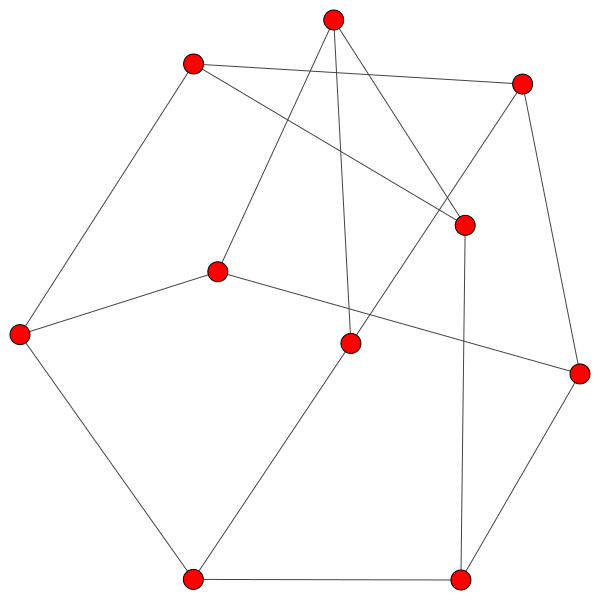

In [7]:
import igraph as ig
import cairocffi as cairo
g = ig.Graph.Famous("petersen")
ig.plot(g)

In [12]:
color_dict = {}
for i in range(10):
    color_dict[i] = "C%d" % i

color_dict[10] = "black"
color_dict[11] = "white"

In [19]:
g = ig.Graph.Adjacency((A > 0).tolist())

# Add edge weights and node labels.
g.es['weight'] = A[A.nonzero()]
#g.vs['color'] = [color_dict[i] for i in clear_true_labels]  # or a.index/a.columns

In [20]:
layout = g.layout_lgl()

#ig.plot(g,layout = "layout_lgl")

In [ ]:
ig.plot(g, layout = layout)

In [52]:
from scipy.stats import wasserstein_distance
import time
start = time.time()
dist_matrix = np.zeros((len(clear_data[0:1]), len(clear_data)))
for i in range(len(clear_data[0:1])):
    for j in range(len(clear_data)):
        if i == j:
            continue  # self-distance is 0.0
        if i > j:
            dist_matrix[i, j] = dist_matrix[j, i]  # re-use earlier calc
        
        dist_matrix[i, j] = wasserstein_distance(clear_data[i], clear_data[j])
elapsed_time_fl = (time.time() - start) 

In [53]:
elapsed_time_fl

9.703246116638184